In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.read_csv('competitive-data-science-predict-future-sales/items.csv')

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [3]:
pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [7]:
shop_df=pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')
shop_df.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
train_df=pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
train_df['date_block_num']

0           0
1           0
2           0
3           0
4           0
           ..
2935844    33
2935845    33
2935846    33
2935847    33
2935848    33
Name: date_block_num, Length: 2935849, dtype: int64

date_blockは0から33まで

In [16]:
train_df['item_id'].value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Length: 21807, dtype: int64

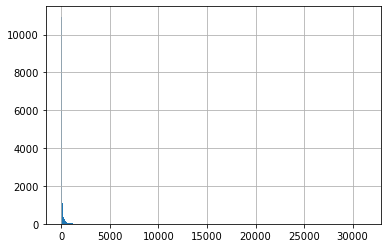

In [21]:
# 売れた品物の品種別の個数
train_df['item_id'].value_counts().hist(bins=1000)

In [25]:
date_block=train_df.groupby('date_block_num')

In [26]:
date_block.size()

date_block_num
0     115690
1     108613
2     121347
3      94109
4      91759
5     100403
6     100548
7     104772
8      96137
9      94202
10     96736
11    143246
12     99349
13     89830
14     92733
15     77906
16     78529
17     82408
18     78760
19     86614
20     73157
21     79361
22     86428
23    130786
24     88522
25     71808
26     69977
27     56274
28     54548
29     54617
30     55549
31     57029
32     50588
33     53514
dtype: int64

In [28]:
date_block.mean()

,shop_id,item_id,item_price,item_cnt_day
date_block_num,,,,
0,29.536416,10234.002827,710.622127,1.136477
1,28.648339,9907.138004,695.866856,1.179325
2,33.098939,10061.325142,694.688063,1.212572
3,33.630981,10321.499166,653.633797,1.138998
4,33.718752,10357.272725,624.179993,1.165771
5,33.511947,10431.473542,630.893644,1.248777
6,33.577555,10612.447587,618.578247,1.163285
7,33.508829,10174.196904,624.576855,1.195844
8,33.372312,9963.610691,756.228823,1.386896


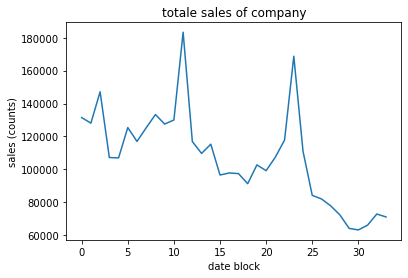

In [31]:
ts = date_block['item_cnt_day'].sum()

plt.title('totale sales of company')
plt.xlabel('date block')
plt.ylabel('sales (counts)')
plt.plot(ts)

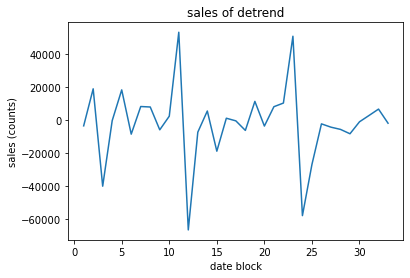

In [36]:
ts_detrend = ts-ts.shift()

plt.title('sales of detrend')
plt.xlabel('date block')
plt.ylabel('sales (counts)')
plt.plot(ts_detrend)